In [5]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

# 1.Loading the Data

In [6]:
df=pd.read_csv("car data.csv")
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


# 2. Exploring data

In [22]:
df.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [8]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [9]:
df.duplicated().sum()

2

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [11]:
df.shape

(301, 9)

In [12]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


# 3.Data Visualization

# 1.Pair Plot

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

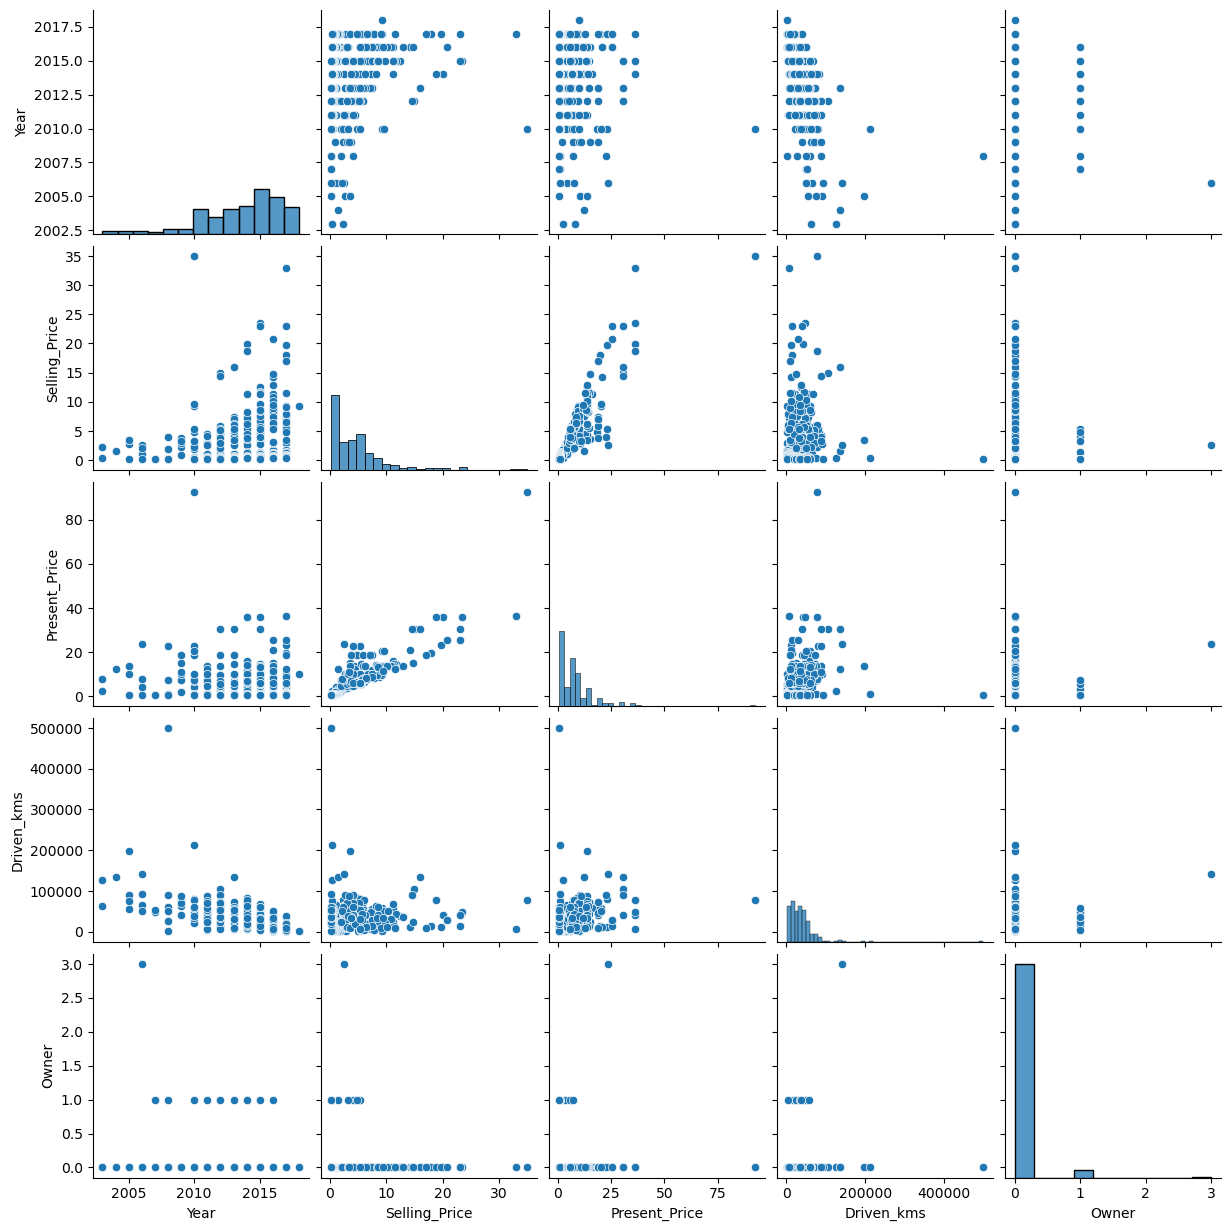

In [13]:
sns.pairplot(df)

# 2. Histogram

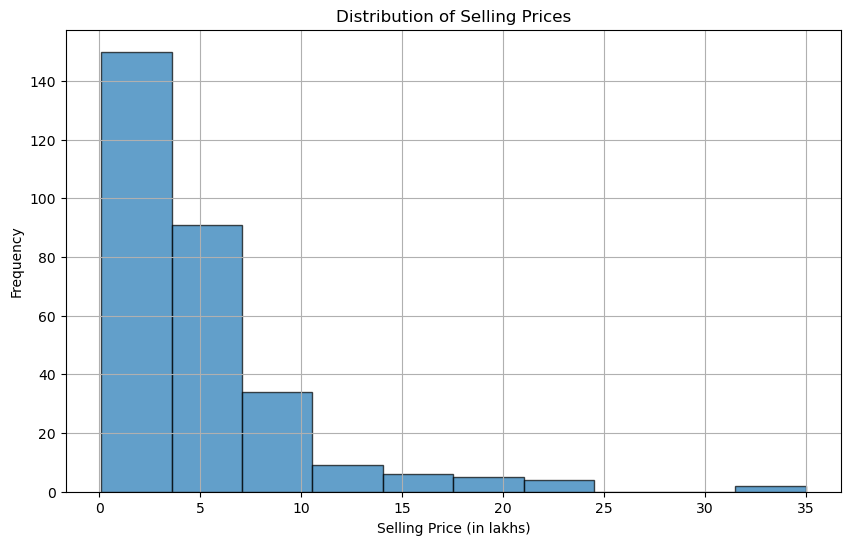

In [18]:
plt.figure(figsize=(10,6))
plt.hist(df['Selling_Price'],bins=10,edgecolor="black",alpha=0.7)
plt.title('Distribution of Selling Prices')
plt.xlabel('Selling Price (in lakhs)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


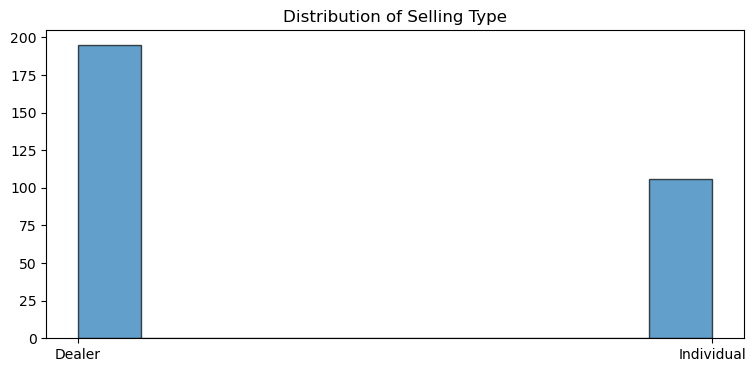

In [29]:
plt.figure(figsize=(9,4))
plt.hist(df['Selling_type'],bins=10,edgecolor="black",alpha=0.7)
plt.title('Distribution of Selling Type')
plt.show()

# 3. BarPlot

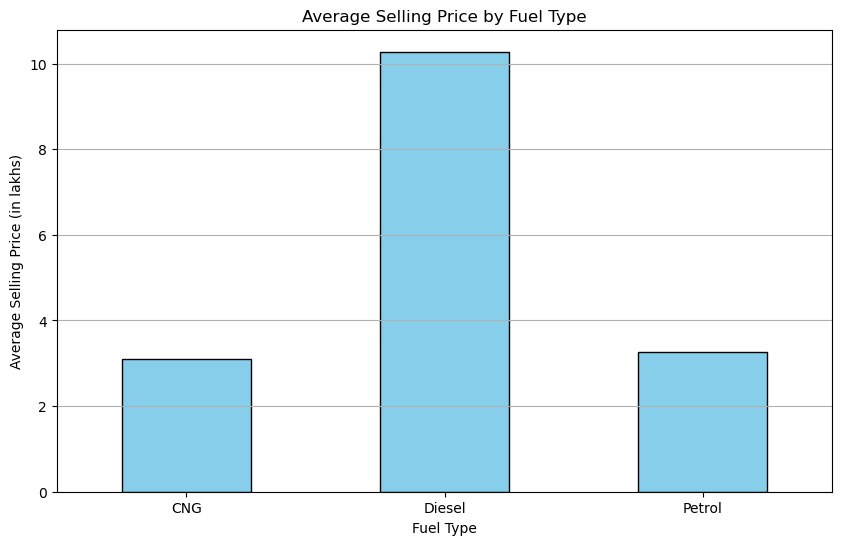

In [19]:
# Calculate average selling price by fuel type
avg_price_by_fuel = df.groupby('Fuel_Type')['Selling_Price'].mean()

# Plotting the bar plot
plt.figure(figsize=(10, 6))
avg_price_by_fuel.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Selling Price by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Average Selling Price (in lakhs)')
plt.xticks(rotation=0)  # Keep the x labels horizontal
plt.grid(axis='y')
plt.show()

# 4.Correlation

In [30]:
#Excluding non-numerical columns
numdf=df.select_dtypes(include=[np.number])
numdf.corr()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
Year,1.000000,0.236141,-0.047192,-0.524342,-0.182104
Selling_Price,0.236141,1.000000,0.878914,0.029187,-0.088344
Present_Price,-0.047192,0.878914,1.000000,0.203618,0.008058
Driven_kms,-0.524342,0.029187,0.203618,1.000000,0.089216
Owner,-0.182104,-0.088344,0.008058,0.089216,1.000000


# 5.Scatter Plot

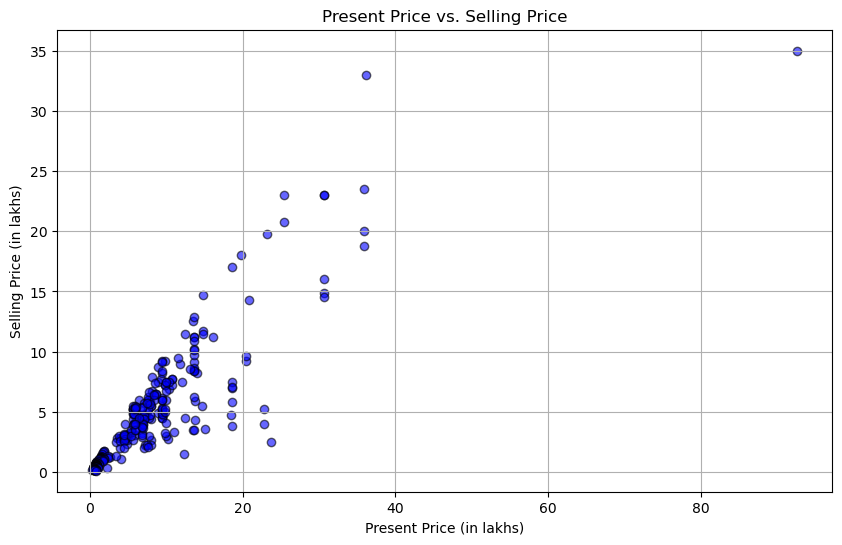

In [31]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Present_Price'], df['Selling_Price'], color='blue', alpha=0.6, edgecolor='black')
plt.title('Present Price vs. Selling Price')
plt.xlabel('Present Price (in lakhs)')
plt.ylabel('Selling Price (in lakhs)')
plt.grid(True)
plt.show()

# 6.Box Plot

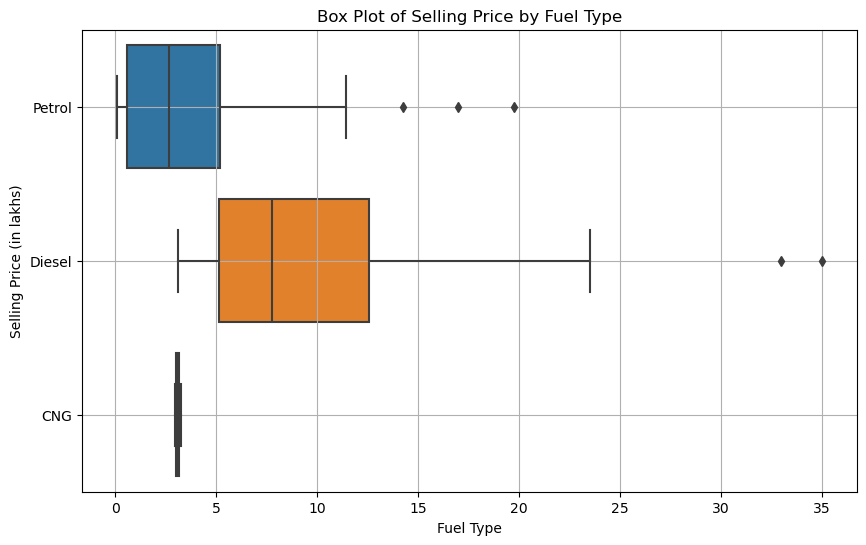

In [38]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Selling_Price', y='Fuel_Type', data=df)
plt.title('Box Plot of Selling Price by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Selling Price (in lakhs)')
plt.grid(True)
plt.show()

# 4. Data Preprocessing and Feature Engineering

# Label Encoding 

In [39]:
from sklearn.preprocessing import LabelEncoder
columns_to_encode = ['Fuel_Type', 'Selling_type', 'Transmission', 'Car_Name']

# Instantiate the LabelEncoder
le = LabelEncoder()
# Apply LabelEncoder to each column
for column in columns_to_encode:
    df[column] = le.fit_transform(df[column])

print(df.head())


   Car_Name  Year  Selling_Price  Present_Price  Driven_kms  Fuel_Type  \
0        90  2014           3.35           5.59       27000          2   
1        93  2013           4.75           9.54       43000          1   
2        68  2017           7.25           9.85        6900          2   
3        96  2011           2.85           4.15        5200          2   
4        92  2014           4.60           6.87       42450          1   

   Selling_type  Transmission  Owner  
0             0             1      0  
1             0             1      0  
2             0             1      0  
3             0             1      0  
4             0             1      0  


# 5. Machine Learning

In [45]:
# Defining the X and y
x=df.drop(columns=['Selling_Price'], axis=1)
y=df['Selling_Price']

In [46]:
# Splitting the data to train and test
# Import model selection libraries
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


# 1.Linear Regression

Predicted Values [ 2.97491895  8.32612847  6.0161235  -1.38172371  9.27940633  7.06928951
  1.30824607  0.74154082  1.38400041  7.12180339  8.69584861  0.54647028
  8.53755625  3.52559619  6.461831    3.03854609  0.42667599 10.91368809
  1.74417072  2.29195225  0.37662088  7.76798131  6.17213021  2.60498874
  0.84816117  3.69954086  5.35530228  2.8301809   2.11511377  1.72142608
  0.42317787  8.82614032 -0.60965683  2.2555362   8.22536901  4.57720813
  7.36810266  7.71076849  2.85141326  8.10873551  3.98313701  4.3789598
  4.40312603  0.55049612  6.91084914  0.46147134  7.43952702 11.46949761
  3.12745561  4.9423416   6.81243382  2.15400554 20.55225973 16.78374986
  7.09182007  9.8550337   4.48118171  8.65492286  1.84936153  7.64066408
  0.21224031]
Mean Squared Error: 3.5370204237558136
R-squared: 0.8464540623816023


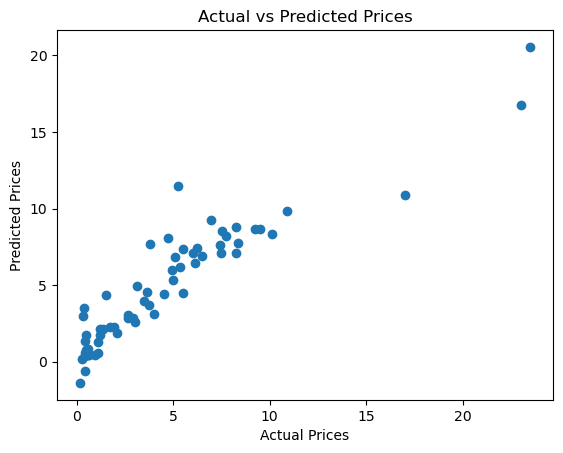

In [69]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Predicted Values",y_pred)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()

# 2. Decision Tree Regressor

In [67]:
from sklearn.tree import DecisionTreeRegressor


tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(x_train, y_train)

# Make predictions
y_pred_tree = tree_model.predict(x_test)
print("Predicted Values",y_pred_tree)

# Decision Tree Evaluation
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print(f"Decision Tree Mean Squared Error: {mse_tree}")
print(f"Decision Tree R-squared: {r2_tree}")

Predicted Values [ 0.5   9.15  4.1   0.2   7.05  7.45  1.11  0.5   0.5   7.2   9.25  1.25
  7.5   0.45  4.75  2.35  1.05 14.25  0.48  1.75  0.25  8.99  4.5   2.7
  0.45  2.9   5.25  3.1   1.15  1.15  0.25  8.55  0.45  2.25  7.75  3.9
  5.85  5.9   2.55  5.9   3.6   3.35  5.85  0.6   6.45  0.65  8.5   4.
  3.1   2.95  4.75  1.45 19.99 20.75  5.95  9.15  5.25  8.99  3.    6.4
  0.25]
Decision Tree Mean Squared Error: 1.019270491803279
Decision Tree R-squared: 0.9557523495483484


# 3. Random Forest Regressor

In [68]:
from sklearn.ensemble import RandomForestRegressor
forest_model=RandomForestRegressor(n_estimators=100,random_state=42)
forest_model.fit(x_train,y_train)

# Make predictions
y_pred_forest=forest_model.predict(x_test)
print("Predicted Values",y_pred_forest)

# Random Forest Evaluation
mse_forest = mean_squared_error(y_test, y_pred_forest)
r2_forest = r2_score(y_test, y_pred_forest)

print(f"Random Forest Mean Squared Error: {mse_forest}")
print(f"Random Forest R-squared: {r2_forest}")



Predicted Values [ 0.4433 10.32    5.01    0.2094  7.8531  6.712   1.1306  0.6118  0.464
  6.641   8.5415  1.1076  7.7683  0.4519  5.2805  2.5645  1.1441 14.6331
  0.4643  1.562   0.3259  7.7878  4.724   2.7225  0.5039  3.4735  5.351
  3.2125  1.1763  1.1608  0.4038  8.1788  0.4639  2.487   8.0283  4.0315
  6.4497  6.1305  2.47    6.6603  4.9542  3.7173  4.7115  0.5678  6.2725
  0.7103  8.006   7.059   2.9005  3.5895  4.951   1.529  22.882  20.6695
  6.5015  9.9883  5.141   8.7332  2.9794  6.599   0.2425]
Random Forest Mean Squared Error: 0.782636952131147
Random Forest R-squared: 0.9660248711535068


# Visualize the Results 

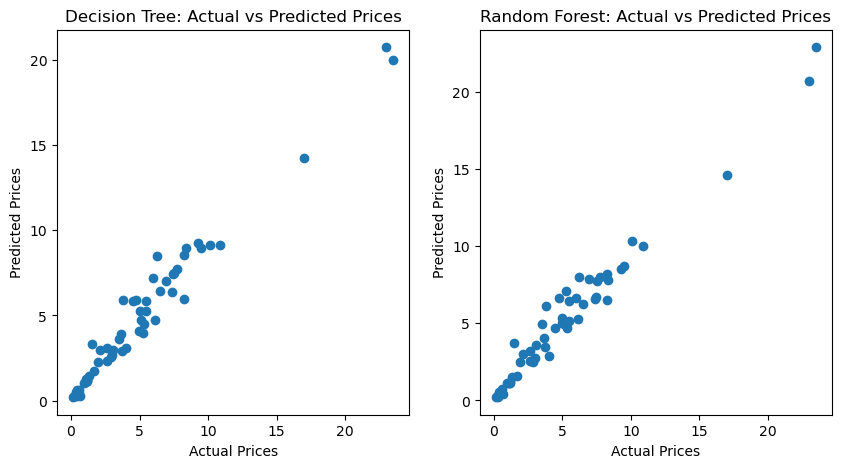

In [54]:
plt.figure(figsize=(10, 5))

# Decision Tree
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_tree)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Decision Tree: Actual vs Predicted Prices")

#Random Forest
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_forest)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Random Forest: Actual vs Predicted Prices")

plt.show()

In [70]:
# Saving the model
import pickle
with open('forest.pkl', 'wb') as file:
    pickle.dump(forest_model, file)
